# Data Profiling

## Import Modules

In [1]:
import pandas
import numpy
import random
import datetime
import os
import math

## Settings

#### Data settings

In [2]:
#Read in data from excel or csv using read_excel or read_csv method
#If read_excel is used make sure you include sheet_name parameter

datapath = "/users/danielcorcoran/desktop/github_repos/\
python_nb_data_profiling/test_data/Sample - Superstore.xls"

data = pandas.read_excel(datapath, sheet_name = "Orders")

print("Dataframe dimensions are {}".format(data.shape))

Dataframe dimensions are (9994, 21)


#### Export path
- Data profile reports get sent to this location
- Visualizations also get sent to this location

In [3]:
exportpath = "/users/danielcorcoran/desktop/github_repos/python_nb_data_profiling/exports/"

#### Report Settings 

In [4]:
report_width = 80
spacing_char = " "

#### Visualization Settings

In [5]:
# filters out cetgorical features to visualize
# features with unique members in between this range will be plotted
nunique_range = [2,7]

#palettes can be set to a list of custom html colours or predefined sets from seaborn library
palette = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

# Sets the type of visualization for non identity pairings
# types available 'kde' (kernel density), 'hist' (histogram)
identity_type = 'kde'

# Sets the type of visualization for non identity pairings
# types available 'scatter', 'reg' (regression)
non_identity_type = 'scatter'

In [6]:
seaborn.set_palette?

Object `seaborn.set_palette` not found.


### Helper function to generate data

In [7]:
def generate_dynamic_random_code(code_length):
    
    characters_string = "abcdefghijklmnopqrstuvwxyz1234567890ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    
    listchar = list(characters_string)
    
    placeholder_string = "-" * code_length
    
    placeholders = list(placeholder_string)
    
    for index in range(len(placeholders)):
    
        random_index = random.randint(0,len(listchar) - 1)
    
        character = listchar[random_index]
    
        placeholders[index] = character
    
    code = "".join(placeholders)
    
    return code

In [8]:
def generate_float_frame(row_count, column_count, assign_col_names = False, nullperc = 0.04):
    
    data = pandas.DataFrame(numpy.random.random((row_count, column_count)))
    
    if assign_col_names == True:
        
        columns = []
        while len(columns) < column_count:
            
            columns.append(generate_dynamic_random_code(8))
            
        data.columns = columns
    
    if nullperc < 0 or nullperc >100:
        nullperc = 0.2
        print("percentage of nulls defaulted to 0.2")
    
    total_cells = data.shape[0] * data.shape[1]
    
    null_cells = int(total_cells * nullperc)
    
    for iteration in range(null_cells):
        
        r_index = random.randint(0,row_count - 1)
        c_index = random.randint(0, column_count - 1)
        data.iloc[r_index, c_index] = None
    
    return data

### Import/Create Data

### Usage Example for `generate_float_frame`
```python
data = generate_float_frame(row_count = 400, #dataframe to have 400 rows
                            column_count = 6, # dataframe to have 6 columns
                            assign_col_names = True, # assign random strings as column names
                            nullperc = 0.05) # approx 5% dataframe has null cells
```

## Extract Profile

### Get Statistical Summary

In [9]:
#call pandas describe method on dataframe
describe = data.describe(include = "all")

#transpose
describe_transposed = describe.T

#reset_index, moving the column names into a new series
describe_final = describe_transposed.reset_index()

In [10]:
describe_final

index count unique                  top  freq  \
0          Row ID  9994    NaN                  NaN   NaN   
1        Order ID  9994   5009       CA-2017-100111    14   
2      Order Date  9994   1237  2016-09-05 00:00:00    38   
3       Ship Date  9994   1334  2015-12-16 00:00:00    35   
4       Ship Mode  9994      4       Standard Class  5968   
5     Customer ID  9994    793             WB-21850    37   
6   Customer Name  9994    793        William Brown    37   
7         Segment  9994      3             Consumer  5191   
8         Country  9994      1        United States  9994   
9            City  9994    531        New York City   915   
10          State  9994     49           California  2001   
11    Postal Code  9994    NaN                  NaN   NaN   
12         Region  9994      4                 West  3203   
13     Product ID  9994   1862      OFF-PA-10001970    19   
14       Category  9994      3      Office Supplies  6026   
15   Sub-Category  9994     17              Binders  1523   
16   Product Name  9994   1850      Staple envelope    48   
17          Sales  9994    NaN                  NaN   NaN   
18       Quantity  9994    NaN                  NaN   NaN   
19       Discount  9994    NaN                  NaN   NaN   
20         Profit  9994    NaN                  NaN   NaN   

                  first                 last      mean       std      min  \
0                   NaN                  NaN    4997.5   2885.16        1   
1                   NaN                  NaN       NaN       NaN      NaN   
2   2014-01-03 00:00:00  2017-12-30 00:00:00       NaN       NaN      NaN   
3   2014-01-07 00:00:00  2018-01-05 00:00:00       NaN       NaN      NaN   
4                   NaN                  NaN       NaN       NaN      NaN   
5                   NaN                  NaN       NaN       NaN      NaN   
6                   NaN                  NaN       NaN       NaN      NaN   
7                   NaN                  NaN       NaN       NaN      NaN   
8                   NaN                  NaN       NaN       NaN      NaN   
9                   NaN                  NaN       NaN       NaN      NaN   
10                  NaN                  NaN       NaN       NaN      NaN   
11                  NaN                  NaN   55190.4   32063.7     1040   
12                  NaN                  NaN       NaN       NaN      NaN   
13                  NaN                  NaN       NaN       NaN      NaN   
14                  NaN                  NaN       NaN       NaN      NaN   
15                  NaN                  NaN       NaN       NaN      NaN   
16                  NaN                  NaN       NaN       NaN      NaN   
17                  NaN                  NaN   229.858   623.245    0.444   
18                  NaN                  NaN   3.78957   2.22511        1   
19                  NaN                  NaN  0.156203  0.206452        0   
20                  NaN                  NaN   28.6569    234.26 -6599.98   

        25%      50%      75%      max  
0   2499.25   4997.5  7495.75     9994  
1       NaN      NaN      NaN      NaN  
2       NaN      NaN      NaN      NaN  
3       NaN      NaN      NaN      NaN  
4       NaN      NaN      NaN      NaN  
5       NaN      NaN      NaN      NaN  
6       NaN      NaN      NaN      NaN  
7       NaN      NaN      NaN      NaN  
8       NaN      NaN      NaN      NaN  
9       NaN      NaN      NaN      NaN  
10      NaN      NaN      NaN      NaN  
11    23223  56430.5    90008    99301  
12      NaN      NaN      NaN      NaN  
13      NaN      NaN      NaN      NaN  
14      NaN      NaN      NaN      NaN  
15      NaN      NaN      NaN      NaN  
16      NaN      NaN      NaN      NaN  
17    17.28    54.49   209.94  22638.5  
18        2        3        5       14  
19        0      0.2      0.2      0.8  
20  1.72875   8.6665   29.364  8399.98

### Get Data Types

In [11]:
# get datatypes of each feature
dtypes = data.dtypes

In [12]:
#convert to dataframe and rename a column
dtypes_dataframe = pandas.DataFrame(dtypes, columns = ["data_type"])

In [13]:
# reset index, moving the column names into a new series
dtypes_final = dtypes_dataframe.reset_index()

In [14]:
# preview
dtypes_final

index       data_type
0          Row ID           int64
1        Order ID          object
2      Order Date  datetime64[ns]
3       Ship Date  datetime64[ns]
4       Ship Mode          object
5     Customer ID          object
6   Customer Name          object
7         Segment          object
8         Country          object
9            City          object
10          State          object
11    Postal Code           int64
12         Region          object
13     Product ID          object
14       Category          object
15   Sub-Category          object
16   Product Name          object
17          Sales         float64
18       Quantity           int64
19       Discount         float64
20         Profit         float64

### Get Null composition

In [15]:
#use notnull() and isnull() methods combined with sum() to
#get null composition of dataset
filled_count_series = data.notnull().sum().astype(int)
null_count_series = data.isnull().sum().astype(int)

#get amount of rows in dataset
totalcount = data.shape[0]

In [16]:
#create percentage series based on series above
percent_null =  null_count_series / totalcount
percent_filled = filled_count_series / totalcount

In [17]:
percent_null = percent_null.reset_index().rename(columns = {0:"null_percent"})
percent_filled = percent_filled.reset_index().rename(columns = {0:"non_null_percent"})
filled_count_series = filled_count_series.reset_index().rename(columns = {0:"non_null_counts"})
null_count_series = null_count_series.reset_index().rename(columns = {0:"null_counts"})

In [18]:
from functools import reduce

In [19]:
null_info_dataframe = reduce(lambda left,right: pandas.merge(left,right,on='index'), [percent_null,
                                                                                 percent_filled,
                                                                                 filled_count_series,
                                                                                 null_count_series])

In [20]:
null_info_dataframe

index  null_percent  non_null_percent  non_null_counts  \
0          Row ID           0.0               1.0             9994   
1        Order ID           0.0               1.0             9994   
2      Order Date           0.0               1.0             9994   
3       Ship Date           0.0               1.0             9994   
4       Ship Mode           0.0               1.0             9994   
5     Customer ID           0.0               1.0             9994   
6   Customer Name           0.0               1.0             9994   
7         Segment           0.0               1.0             9994   
8         Country           0.0               1.0             9994   
9            City           0.0               1.0             9994   
10          State           0.0               1.0             9994   
11    Postal Code           0.0               1.0             9994   
12         Region           0.0               1.0             9994   
13     Product ID           0.0               1.0             9994   
14       Category           0.0               1.0             9994   
15   Sub-Category           0.0               1.0             9994   
16   Product Name           0.0               1.0             9994   
17          Sales           0.0               1.0             9994   
18       Quantity           0.0               1.0             9994   
19       Discount           0.0               1.0             9994   
20         Profit           0.0               1.0             9994   

    null_counts  
0             0  
1             0  
2             0  
3             0  
4             0  
5             0  
6             0  
7             0  
8             0  
9             0  
10            0  
11            0  
12            0  
13            0  
14            0  
15            0  
16            0  
17            0  
18            0  
19            0  
20            0


### Merge all

In [21]:
merged = reduce(
    lambda left, right: pandas.merge(left, right, on='index', how="left"),
    [null_info_dataframe, dtypes_final, describe_final])

### Cleanup

#### Drop count column

In [22]:
merged["row_count"] = totalcount

merged.drop(["count"], axis = 1, inplace = True)

In [23]:
merged

index  null_percent  non_null_percent  non_null_counts  \
0          Row ID           0.0               1.0             9994   
1        Order ID           0.0               1.0             9994   
2      Order Date           0.0               1.0             9994   
3       Ship Date           0.0               1.0             9994   
4       Ship Mode           0.0               1.0             9994   
5     Customer ID           0.0               1.0             9994   
6   Customer Name           0.0               1.0             9994   
7         Segment           0.0               1.0             9994   
8         Country           0.0               1.0             9994   
9            City           0.0               1.0             9994   
10          State           0.0               1.0             9994   
11    Postal Code           0.0               1.0             9994   
12         Region           0.0               1.0             9994   
13     Product ID           0.0               1.0             9994   
14       Category           0.0               1.0             9994   
15   Sub-Category           0.0               1.0             9994   
16   Product Name           0.0               1.0             9994   
17          Sales           0.0               1.0             9994   
18       Quantity           0.0               1.0             9994   
19       Discount           0.0               1.0             9994   
20         Profit           0.0               1.0             9994   

    null_counts       data_type unique                  top  freq  \
0             0           int64    NaN                  NaN   NaN   
1             0          object   5009       CA-2017-100111    14   
2             0  datetime64[ns]   1237  2016-09-05 00:00:00    38   
3             0  datetime64[ns]   1334  2015-12-16 00:00:00    35   
4             0          object      4       Standard Class  5968   
5             0          object    793             WB-21850    37   
6             0          object    793        William Brown    37   
7             0          object      3             Consumer  5191   
8             0          object      1        United States  9994   
9             0          object    531        New York City   915   
10            0          object     49           California  2001   
11            0           int64    NaN                  NaN   NaN   
12            0          object      4                 West  3203   
13            0          object   1862      OFF-PA-10001970    19   
14            0          object      3      Office Supplies  6026   
15            0          object     17              Binders  1523   
16            0          object   1850      Staple envelope    48   
17            0         float64    NaN                  NaN   NaN   
18            0           int64    NaN                  NaN   NaN   
19            0         float64    NaN                  NaN   NaN   
20            0         float64    NaN                  NaN   NaN   

                  first                 last      mean       std      min  \
0                   NaN                  NaN    4997.5   2885.16        1   
1                   NaN                  NaN       NaN       NaN      NaN   
2   2014-01-03 00:00:00  2017-12-30 00:00:00       NaN       NaN      NaN   
3   2014-01-07 00:00:00  2018-01-05 00:00:00       NaN       NaN      NaN   
4                   NaN                  NaN       NaN       NaN      NaN   
5                   NaN                  NaN       NaN       NaN      NaN   
6                   NaN                  NaN       NaN       NaN      NaN   
7                   NaN                  NaN       NaN       NaN      NaN   
8                   NaN                  NaN       NaN       NaN      NaN   
9                   NaN                  NaN       NaN       NaN      NaN   
10                  NaN                  NaN       NaN       NaN      NaN   
11                  NaN     

#### Change types

In [24]:
merged["data_type"] = merged["data_type"].astype(str)

#### Round values

In [25]:
rounded_places = 4

for column in ["mean", "std", "min", "25%", "50%", "75%", "max"]:
    
    merged[column] = merged[column].astype(float).round(rounded_places)

### Create dictionary and print

In [26]:
profile_dict = {}

In [27]:
#get list of colunmns other than 'index' column
merged_attributes = list(merged.columns)[1:]

just_width = math.floor(report_width / 2)

number_rows = merged.shape[0]

for index in range(number_rows):

    column = merged.loc[index, "index"]
    
    column_string = "  {} ({}/{})  ".format(column, index + 1, number_rows)
    
    #print feature name
    print("\n\n", column_string.center(report_width, "-"), "\n", sep="")

    #create empty list per key (column name)
    profile_dict[column] = []

    #print feature stats iteratively
    for attr in merged_attributes:

        attr_ = attr + ":"
        value = merged.loc[index, attr]
        value_string = str(value)

        if "percent" in attr:
            print(
                attr_.ljust(just_width, spacing_char),
                "{0:.2}".format(value).rjust(just_width, spacing_char),
                sep="")
        else:
            print(
                attr_.ljust(just_width, spacing_char),
                value_string.rjust(just_width, spacing_char),
                sep="")

        profile_dict[column].append({attr: value})



-------------------------------  Row ID (1/21)  --------------------------------

null_percent:                                                                0.0
non_null_percent:                                                            1.0
non_null_counts:                                                            9994
null_counts:                                                                   0
data_type:                                                                 int64
unique:                                                                      nan
top:                                                                         nan
freq:                                                                        nan
first:                                                                       nan
last:                                                                        nan
mean:                                                                     4997.5
std:                     

### Export results as .json and .csv

#### Helper Function to convert invalid json values

In [28]:
# will try to convert a value to a float, followed by string,
# if the float conversion fails

def convert_invalid_values(value):
    
    try:
        new_value = float(value)
    except:
        new_value = str(value)

    return new_value

#### Export as json

In [29]:
with open(exportpath + "profile.json", "w") as fileobj:
    # for errors I want to attempt to convert the value to a float before str using
    # the function defined above
    json.dump(profile_dict, fileobj, default = convert_invalid_values)
    
fileobj.close()

#### Export as csv

In [30]:
merged.to_csv(exportpath + "profile.csv", index = False)

## Visualize
(Optional)

#### Import and set seaborn settings 

In [31]:
import seaborn
import matplotlib.pyplot as plt

In [32]:
seaborn.set(font_scale=4)

In [33]:
seaborn.set_style("whitegrid")

#### Create subset of data without nulls for visualizing

In [34]:
data_no_nulls = data.dropna(how = "any", 
                            axis = 0)

In [35]:
data_no_nulls.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

##### Default parameters
```python
seaborn.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='hist', markers=None, size=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None)
```

#### Calculate which columns can be used as categories to split float data in pairplots

['Ship Mode', 'Segment', 'Region', 'Category']


<Figure size 1440x864 with 0 Axes>

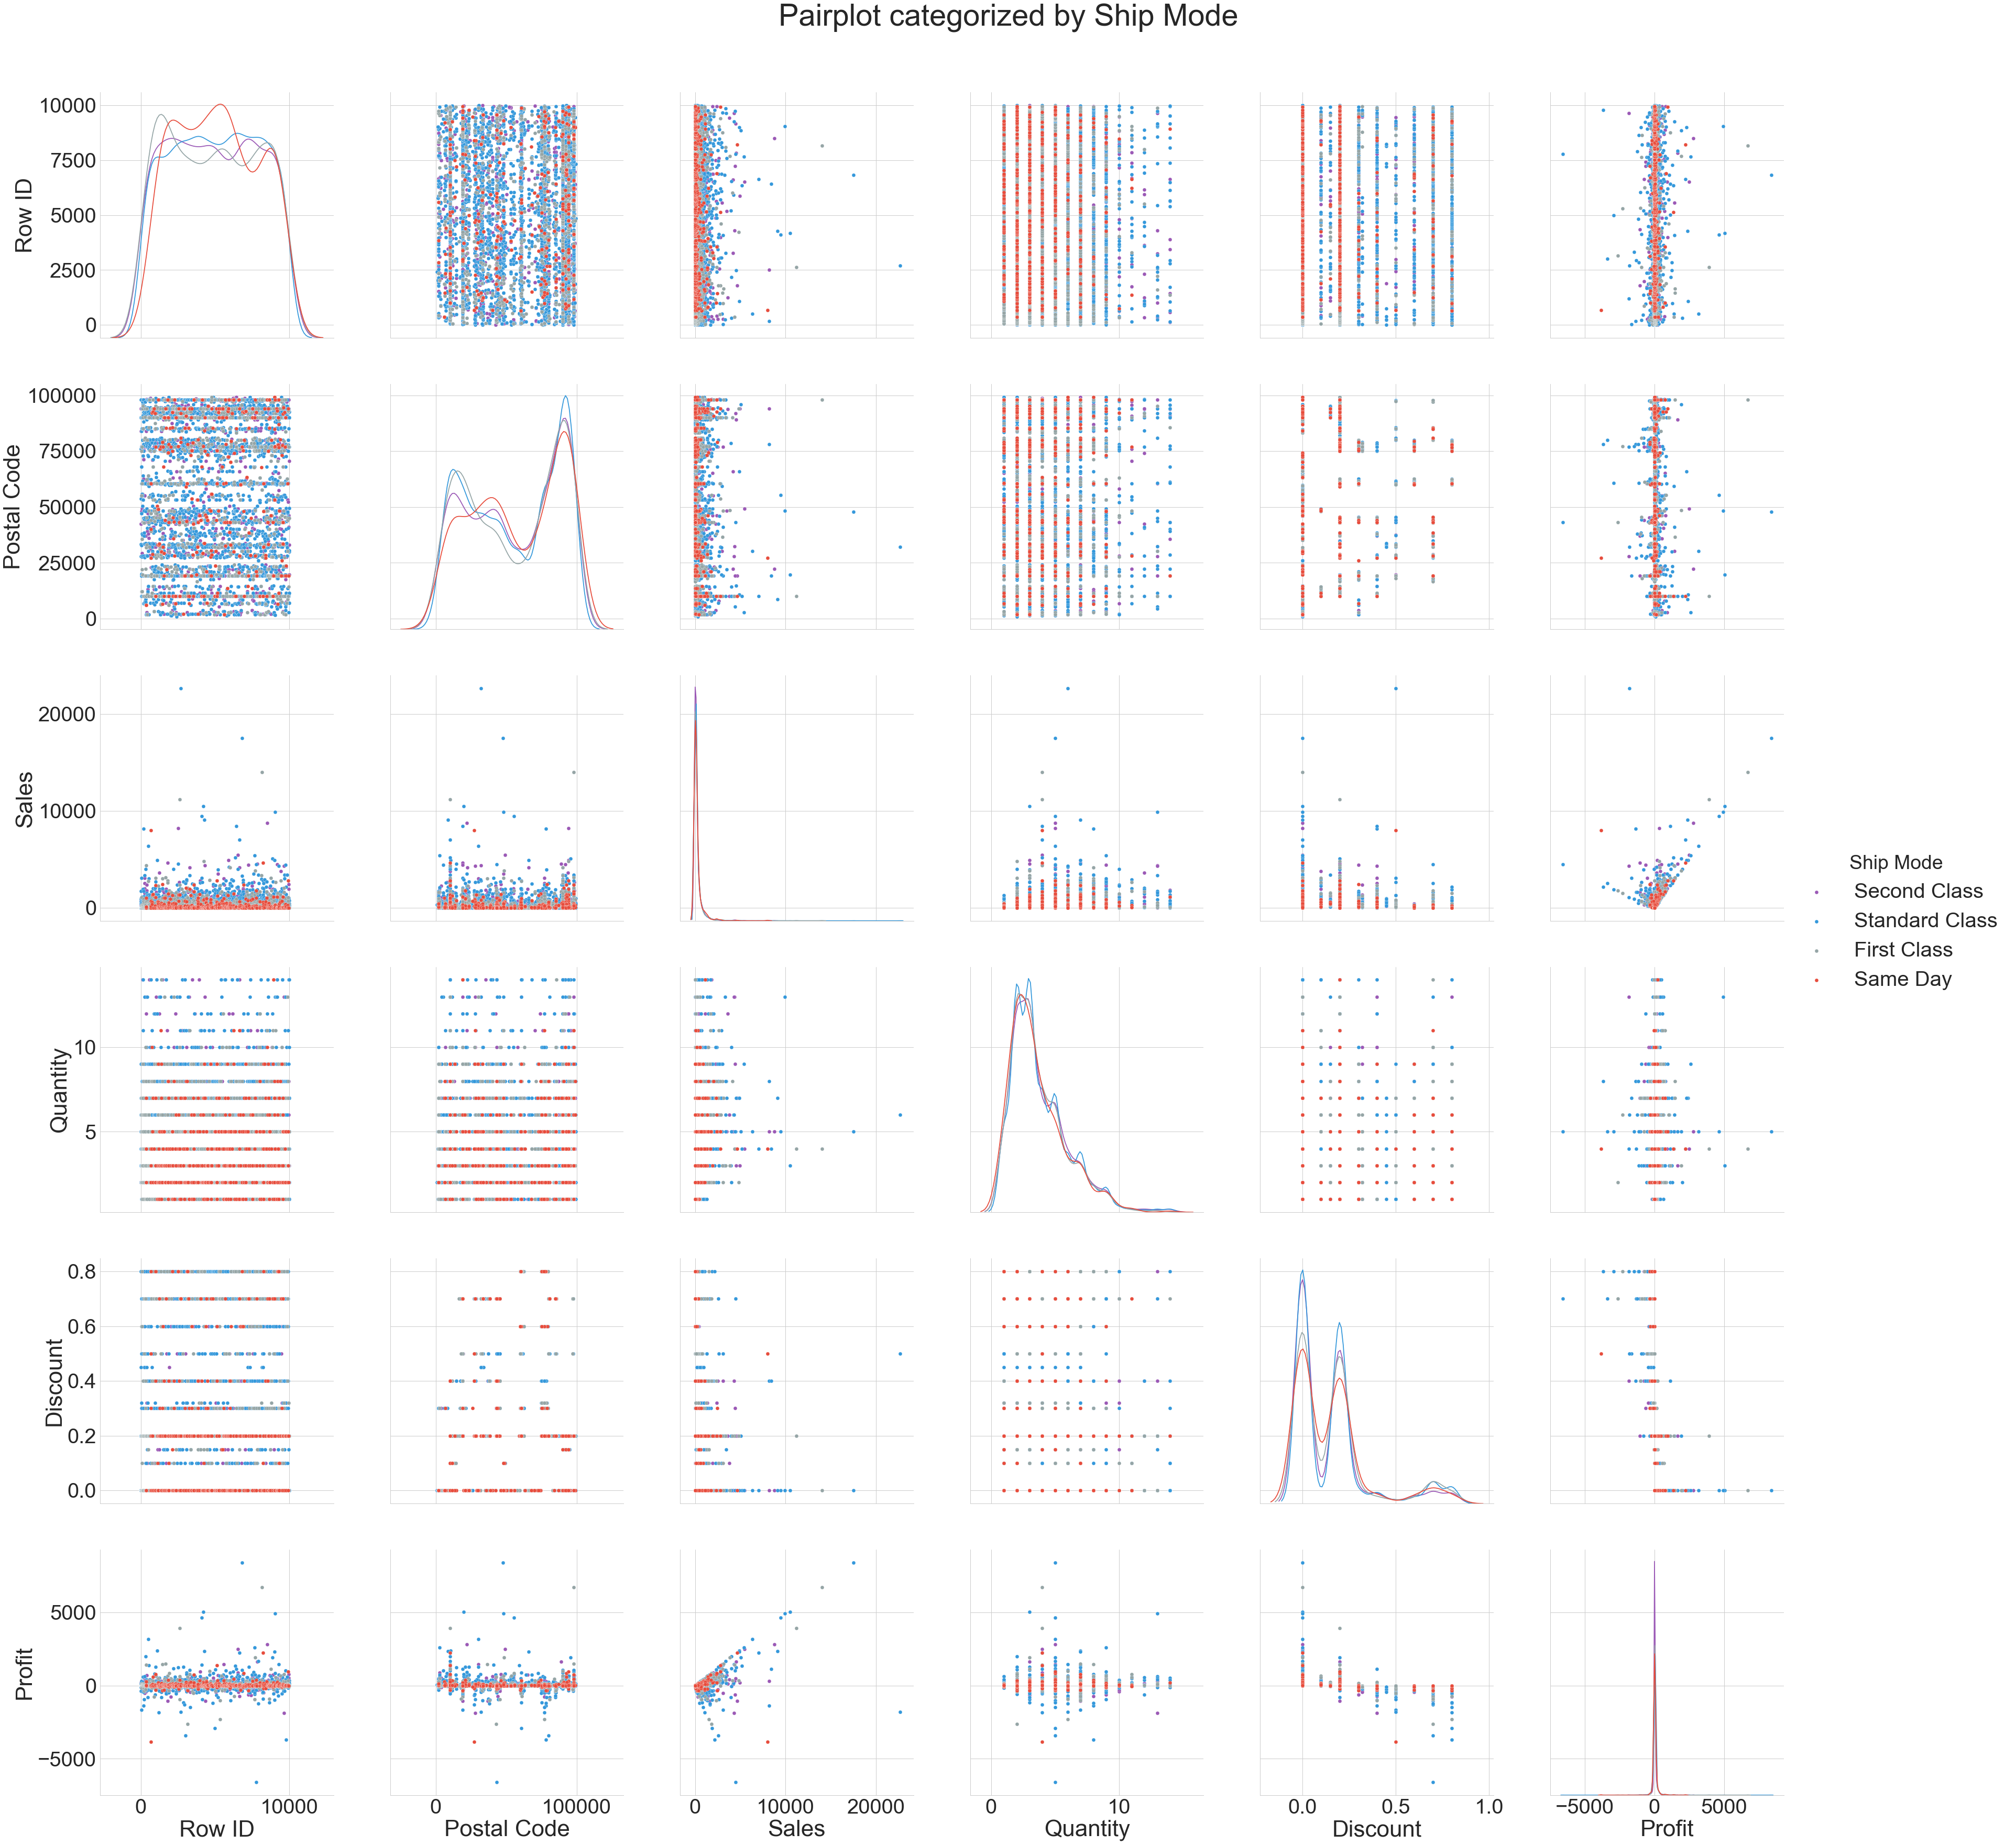

<Figure size 1440x864 with 0 Axes>

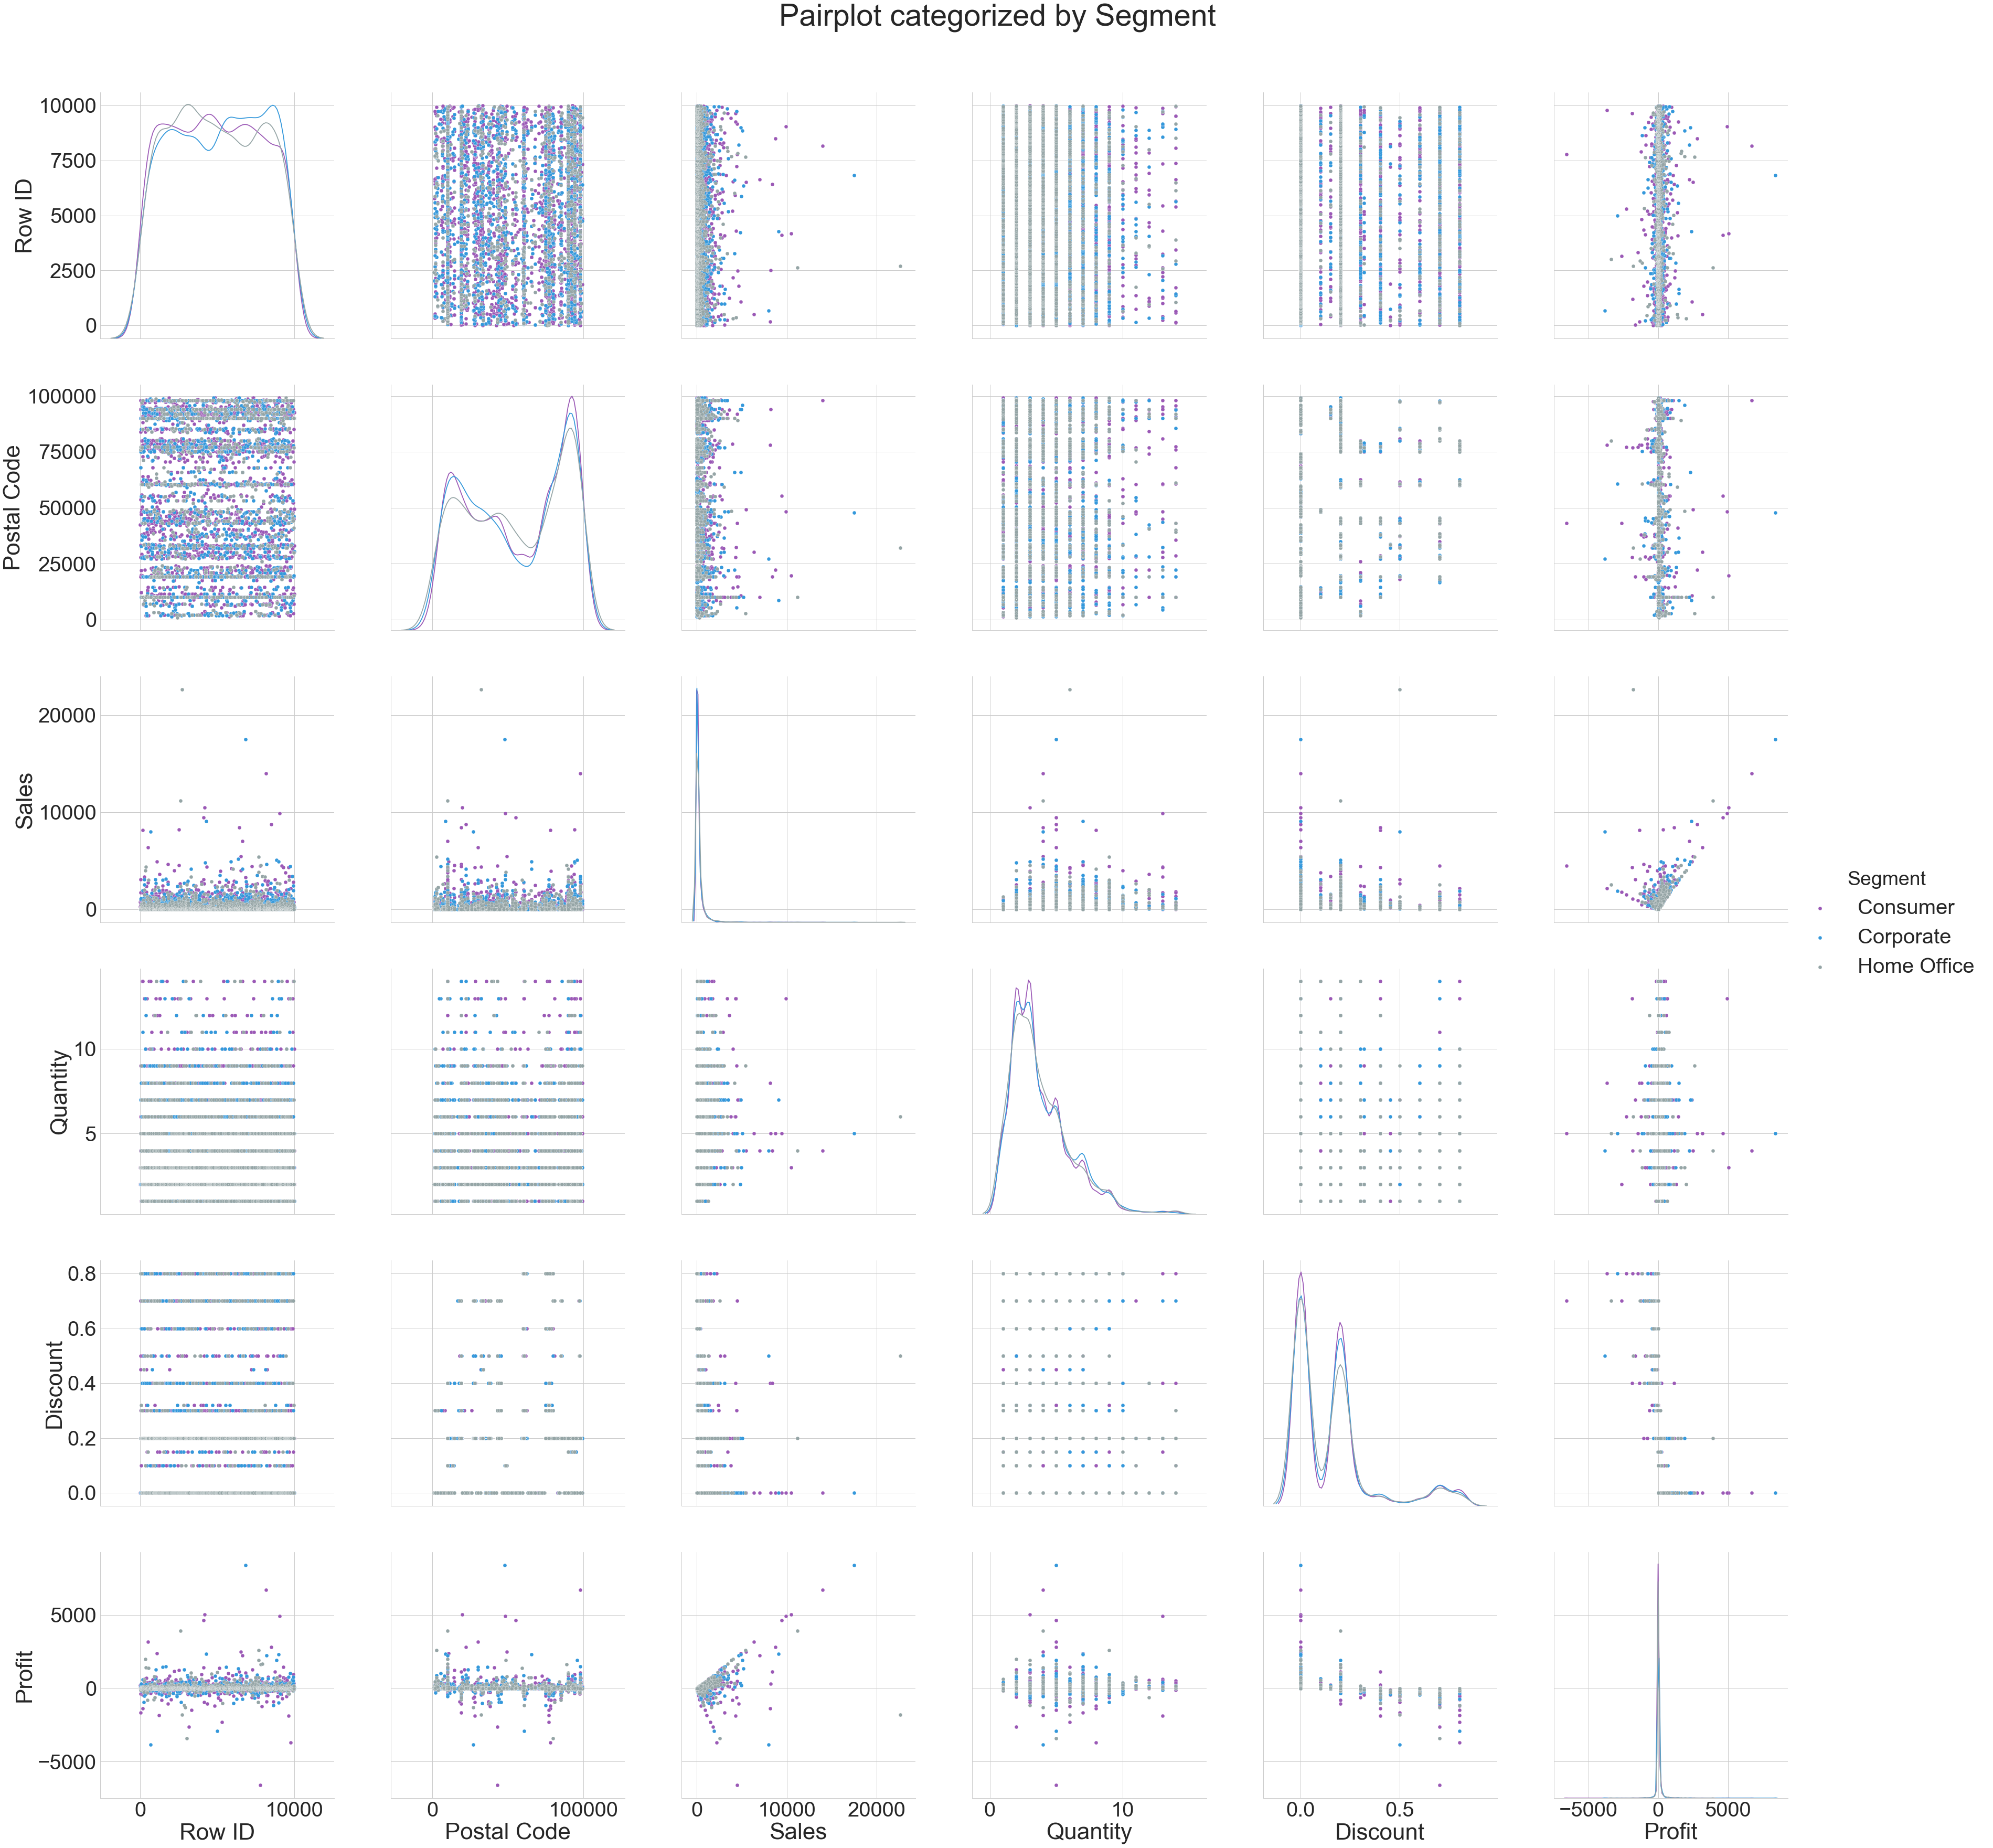

<Figure size 1440x864 with 0 Axes>

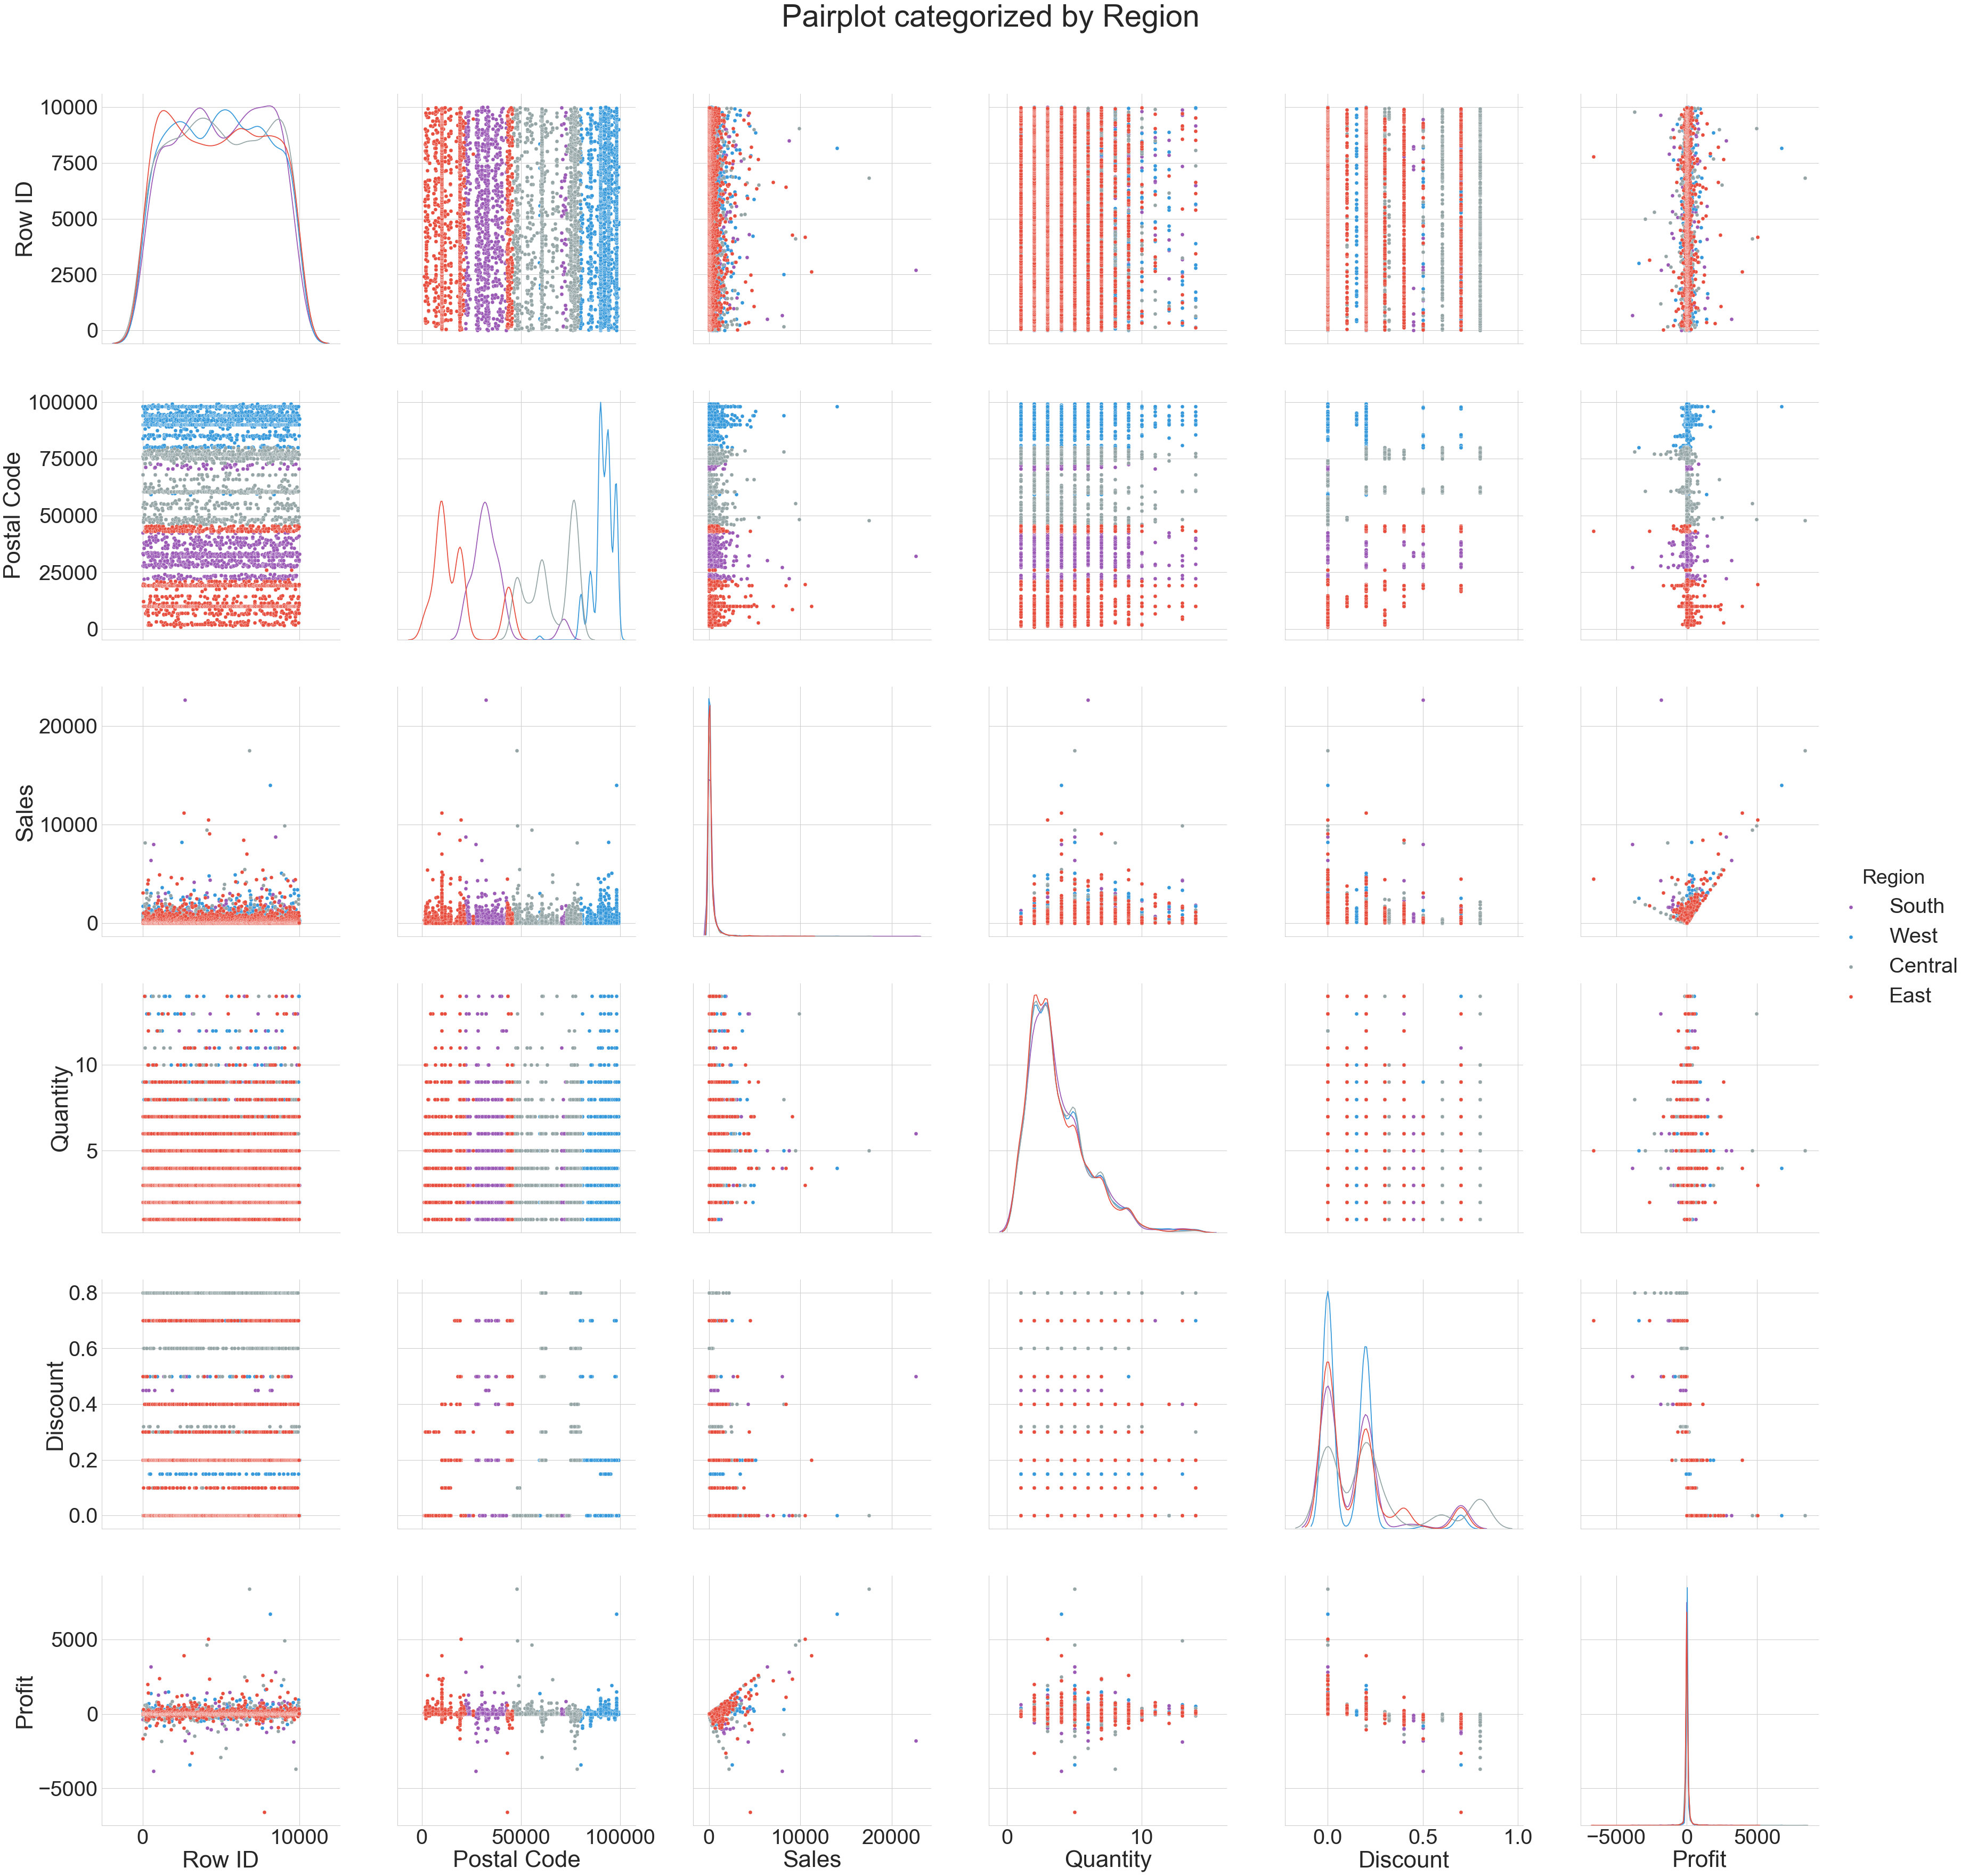

<Figure size 1440x864 with 0 Axes>

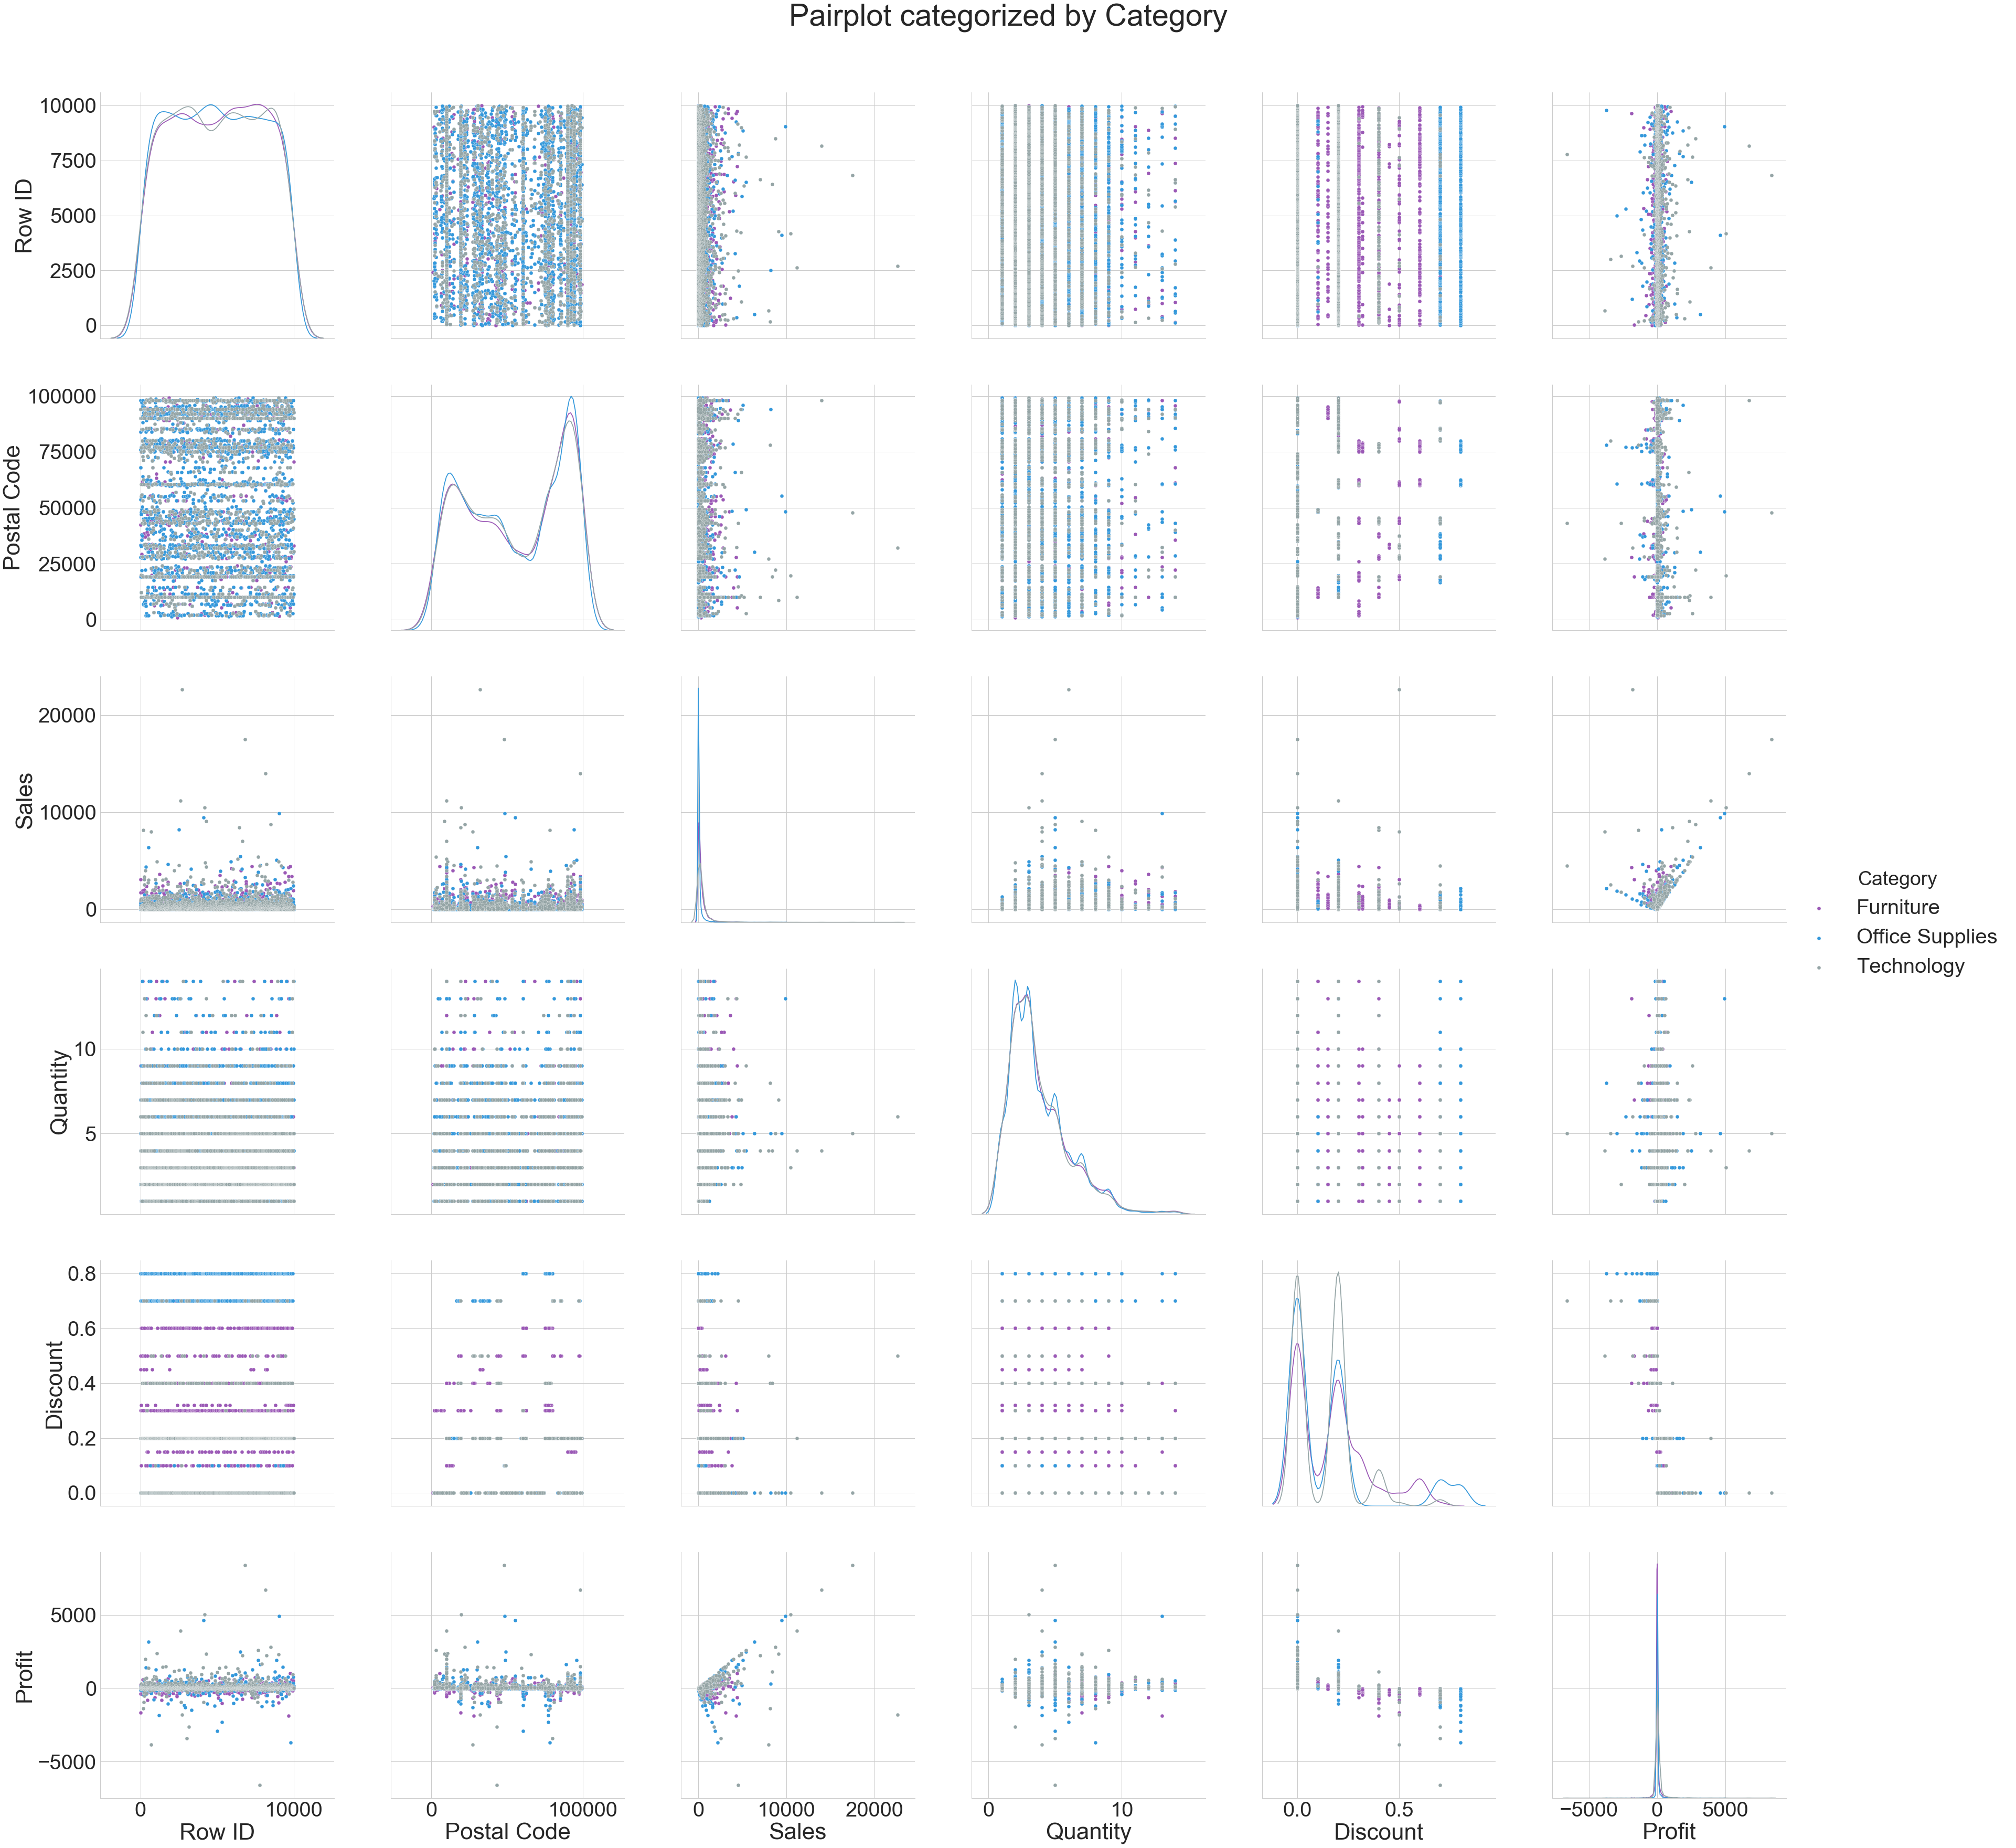

In [39]:
#create subset of merged containing data type = object and nunique between range above
#if we have an object column with categories do this
if "unique" in merged.columns:
    
    subset_merged = list(merged[(merged["unique"] >= nunique_range[0]) & 
                           (merged["unique"] <= nunique_range[1]) & 
                           (merged["data_type"] == "object")]["index"])

    #preview categorical features 
    print(subset_merged)

    for column in subset_merged:

        plt.figure(figsize = (20,12))

        myplot = seaborn.pairplot(data = data_no_nulls, 
                                  kind = non_identity_type,
                                  diag_kind = identity_type,
                                  hue = column,
                                  palette = palette, size = 8
                                 )

        myplot.fig.suptitle("Pairplot categorized by {}".format(column), 
                     y = 1.03)

        plt.savefig(exportpath + column + "_pairplot.png")
        
#if we only have floats in our data do this
else:
    
    plt.figure(figsize = (20,12))

    myplot = seaborn.pairplot(data = data_no_nulls, 
                              kind = non_identity_type,
                              diag_kind = identity_type, size = 8
                             )

    myplot.fig.suptitle("Pairplot", 
                 y = 1.03)

    plt.savefig(exportpath + "data_profile_pairplot.png")